In [1]:
import cv2
import numpy as np
import os
from skimage.morphology import skeletonize
from skimage.morphology import closing, square
from PIL import Image
import matplotlib.pyplot as plt
from utils import thin_spiral_image_with_custom_cut, find_spiral_start, \
         trace_spiral_and_create_image

In [3]:
path = r'C:\Users\Baumann\Documents\UU\03_semester\AIA\project\data'

In [40]:
names = []
trace_distances_all = []
trace_angle_all = []

for file_path in os.listdir(path):
    print(file_path)
    img, cut_img_cropped, skeleton_img_cropped = thin_spiral_image_with_custom_cut(path + '\\' + file_path, white_out=True,  field_of_interest=[(-81, 57), (-91, 122)])
    spiral_start_refined = find_spiral_start(skeleton_img_cropped, point=(0, 0), first=True)
    skeleton_img_trace = skeleton_img_cropped.copy()
    trace_path, trace_distances, trace_result_image, trace_angle = trace_spiral_and_create_image(skeleton_img_trace, spiral_start_refined)
    '''
    for i in range(len(trace_angle)-1):
        if trace_angle[i] - trace_angle[i+1] > 2:
            trace_angle[i+1:] += np.pi * np.ones(len(trace_angle[i+1:]))
        elif trace_angle[i] - trace_angle[i+1] < -2:
            trace_angle[i+1:] -= np.pi * np.ones(len(trace_angle[i+1:]))
    '''
    trace_angle_all.append(trace_angle)
    trace_distances_all.append(trace_distances)
    names.append(file_path)


control1.tiff
control10.tiff
control11.tiff
control12.tiff
control13.tiff
control14.tiff
control15.tiff
control2.tiff
control3.tiff
control4.tiff
control5.tiff
control6.tiff
control7.tiff
control8.tiff
control9.tiff
control_dynamic1.tiff
control_dynamic10.tiff
control_dynamic11.tiff
control_dynamic12.tiff
control_dynamic13.tiff
control_dynamic14.tiff
control_dynamic15.tiff
control_dynamic2.tiff
control_dynamic3.tiff
control_dynamic4.tiff
control_dynamic5.tiff
control_dynamic6.tiff
control_dynamic7.tiff
control_dynamic8.tiff
control_dynamic9.tiff
parkinson1.tiff
parkinson10.tiff
parkinson11.tiff
parkinson12.tiff
parkinson13.tiff
parkinson14.tiff
parkinson15.tiff
parkinson16.tiff
parkinson17.tiff
parkinson18.tiff
parkinson19.tiff
parkinson2.tiff
parkinson20.tiff
parkinson21.tiff
parkinson22.tiff
parkinson23.tiff
parkinson24.tiff
parkinson25.tiff
parkinson3.tiff
parkinson4.tiff
parkinson5.tiff
parkinson6.tiff
parkinson7.tiff
parkinson8.tiff
parkinson9.tiff
parkinson_dynamic1.tiff
parkinso

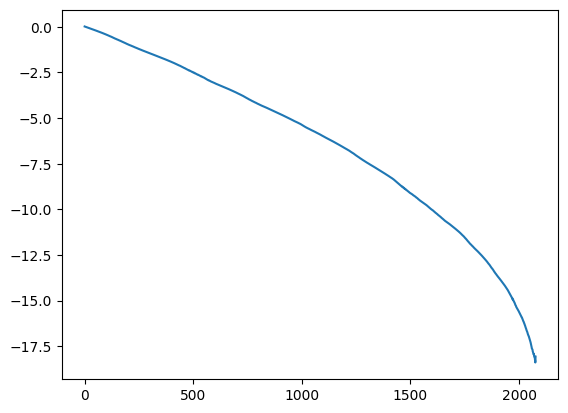

In [46]:
angles_new = [list(reversed(i)) for i in trace_angle_all]

for index, j in enumerate(angles_new):
    for i in range(len(j)-1):
        if j[i] - j[i+1] > 2:
            angles_new[index][i+1:] += np.pi * np.ones(len(j[i+1:]))
        elif j[i] - j[i+1] < -2:
            angles_new[index][i+1:] -= np.pi * np.ones(len(j[i+1:]))

plt.plot(angles_new[0])

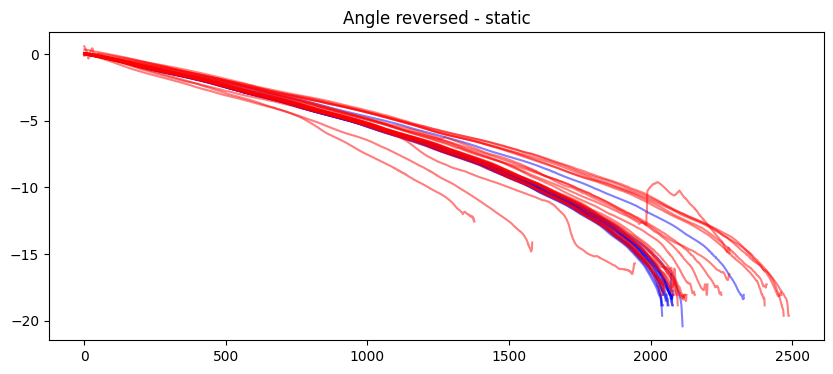

Text(0.5, 1.0, 'Angle reversed - dynamic')

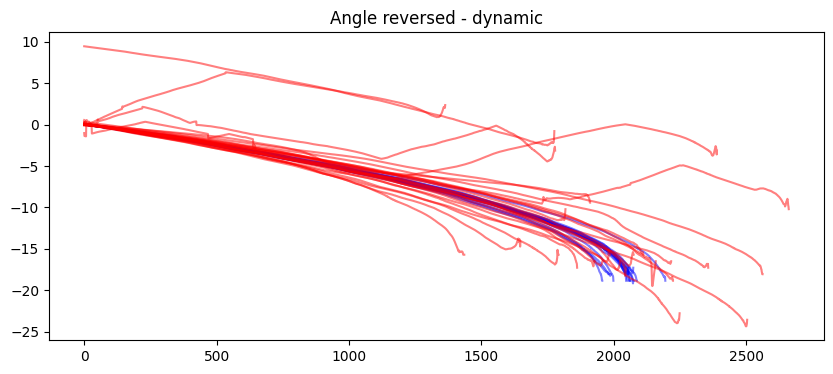

In [50]:
plt.figure(figsize=(10, 4))
for i, j in zip(angles_new, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        #i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Angle reversed - static')
#plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 4))
for i, j in zip(angles_new, names):
    if 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        #i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Angle reversed - dynamic')

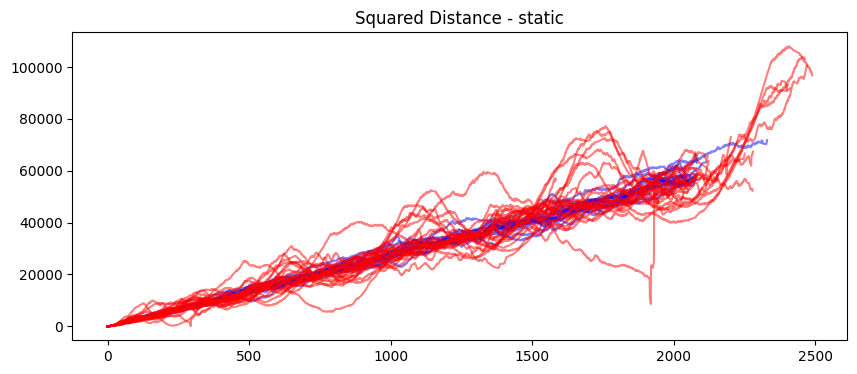

Text(0.5, 1.0, 'Squared Distance - dynamic')

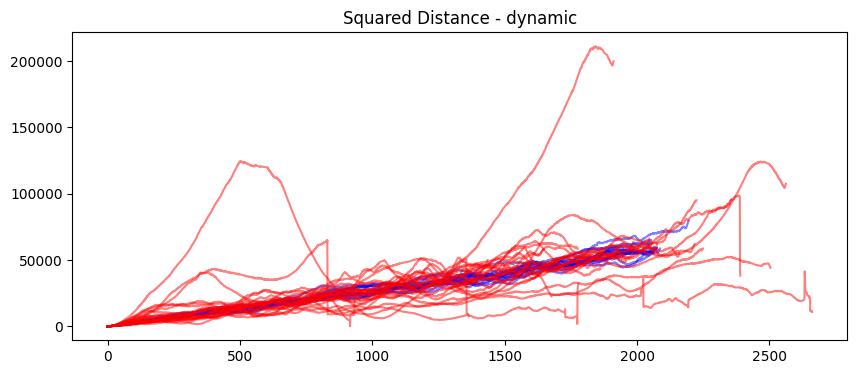

In [39]:

plt.figure(figsize=(10, 4))
for i, j in zip(trace_distances_all, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Distance - static')
plt.show()

plt.figure(figsize=(10, 4))
for i, j in zip(trace_distances_all, names):
    if 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Distance - dynamic')

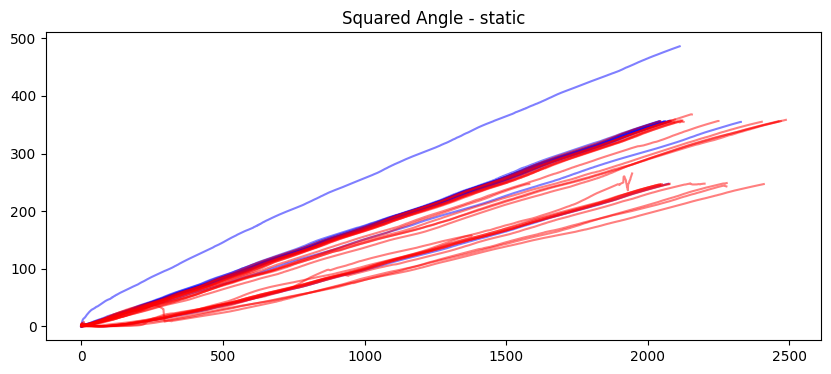

Text(0.5, 1.0, 'Squared Angle - dynamic')

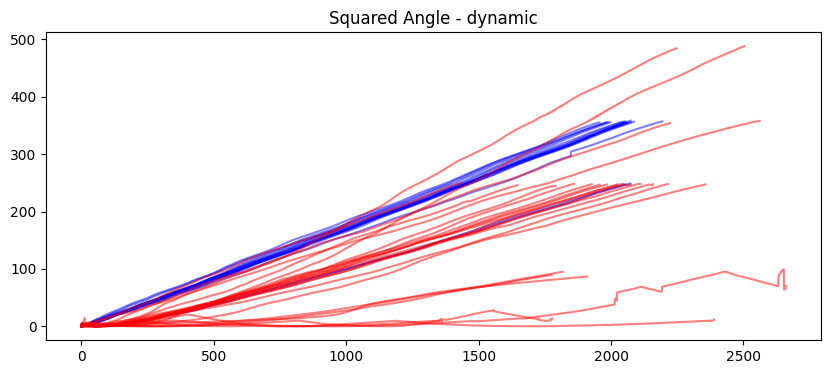

In [37]:

plt.figure(figsize=(10, 4))
for i, j in zip(trace_angle_all, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Angle - static')
#plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 4))
for i, j in zip(trace_angle_all, names):
    if 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Angle - dynamic')